# Predicting the Beats-per-Minute

This project focuses on predicting 'BeatsPerMinute' (BPM) from various audio track features. The workflow encompasses comprehensive data analysis, traditional machine learning modeling with LightGBM and ensemble techniques (stacking), and a deep learning approach using a Multi-Layer Perceptron (MLP) with residual blocks. Key steps include:

- **Data Loading and Initial Exploration**: Understanding the dataset's structure and summary statistics.
- **Exploratory Data Analysis (EDA)**: Visualizing distributions, correlations, and identifying outliers.
- **Data Preprocessing**: Scaling features and handling outliers to prepare data for models.
- **Feature Engineering**: Creating new, more informative features from existing ones.
- **Machine Learning Modeling**: Training and hyperparameter tuning of LightGBM, and developing an ensemble model (LightGBM, XGBoost, CatBoost, RandomForest) with cross-validation and stacking.
- **Deep Learning Solution**: Implementing a neural network (MLP with Residual Blocks) with a PyTorch-based training pipeline and cross-validation.

The ultimate goal is to build a robust predictive model for 'BeatsPerMinute' by exploring and combining the strengths of different modeling paradigms.

### Data Loading and Initial Exploration

This section focuses on loading the dataset and performing initial explorations to understand its structure and content.

- `df.head()`: Provides a quick overview of the first few rows of the DataFrame, showing the column names and a sample of the data.
- `df.info()`: Displays a concise summary of the DataFrame, including the number of non-null entries per column, data types, and memory usage. This is crucial for identifying missing values and understanding data types.
- `df.describe()`: Generates descriptive statistics of the numerical columns in the DataFrame, such as count, mean, standard deviation, min, max, and quartiles. This helps in understanding the central tendency, dispersion, and shape of the data distribution.

In [ ]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('train.csv', index_col='id')
y = df['BeatsPerMinute']
X = df.drop('BeatsPerMinute', axis=1)
df.head()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
id,,,,,,,,,,
0,0.603610,-7.636942,0.023500,0.000005,0.000001,0.051385,0.409866,290715.6450,0.826267,147.53020
1,0.639451,-16.267598,0.071520,0.444929,0.349414,0.170522,0.651010,164519.5174,0.145400,136.15963
2,0.514538,-15.953575,0.110715,0.173699,0.453814,0.029576,0.423865,174495.5667,0.624667,55.31989
3,0.734463,-1.357000,0.052965,0.001651,0.159717,0.086366,0.278745,225567.4651,0.487467,147.91212
4,0.532968,-13.056437,0.023500,0.068687,0.000001,0.331345,0.477769,213960.6789,0.947333,89.58511


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524164 entries, 0 to 524163
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   RhythmScore                524164 non-null  float64
 1   AudioLoudness              524164 non-null  float64
 2   VocalContent               524164 non-null  float64
 3   AcousticQuality            524164 non-null  float64
 4   InstrumentalScore          524164 non-null  float64
 5   LivePerformanceLikelihood  524164 non-null  float64
 6   MoodScore                  524164 non-null  float64
 7   TrackDurationMs            524164 non-null  float64
 8   Energy                     524164 non-null  float64
 9   BeatsPerMinute             524164 non-null  float64
dtypes: float64(10)
memory usage: 44.0 MB


In [ ]:
df.describe()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy,BeatsPerMinute
count,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000,524164.000000
mean,0.632843,-8.379014,0.074443,0.262913,0.117690,0.178398,0.555843,241903.692949,0.500923,119.034899
std,0.156899,4.616221,0.049939,0.223120,0.131845,0.118186,0.225480,59326.601501,0.289952,26.468077
min,0.076900,-27.509725,0.023500,0.000005,0.000001,0.024300,0.025600,63973.000000,0.000067,46.718000
25%,0.515850,-11.551933,0.023500,0.069413,0.000001,0.077637,0.403921,207099.876625,0.254933,101.070410
50%,0.634686,-8.252499,0.066425,0.242502,0.074247,0.166327,0.564817,243684.058150,0.511800,118.747660
75%,0.739179,-4.912298,0.107343,0.396957,0.204065,0.268946,0.716633,281851.658500,0.746000,136.686590
max,0.975000,-1.357000,0.256401,0.995000,0.869258,0.599924,0.978000,464723.228100,1.000000,206.037000


### Exploratory Data Analysis (EDA)

This section performs a comprehensive Exploratory Data Analysis to understand the characteristics of the dataset.

- **Target Variable Analysis (Distribution)**: Visualizes the distribution of the target variable (`BeatsPerMinute`) using a histogram with a Kernel Density Estimate (KDE). This helps in understanding the spread, central tendency, and shape of the target variable.
- **Feature Distributions**: Iterates through each feature in the dataset and plots its distribution using histograms with KDE. This provides insights into the individual distribution of each feature, helping to identify skewness, modality, and potential outliers.
- **Correlation Analysis**: Computes and visualizes the Pearson correlation matrix for all variables in the dataset. A heatmap is used to display the correlation coefficients, helping to identify strong linear relationships between features and with the target variable. Only the upper triangle of the matrix is shown to avoid redundancy.
- **Outlier Detection (Boxplots)**: Generates boxplots for each feature to visually identify potential outliers. Boxplots display the distribution of data based on a five-number summary (minimum, first quartile, median, third quartile, and maximum), with points extending beyond the 'whiskers' indicating outliers.

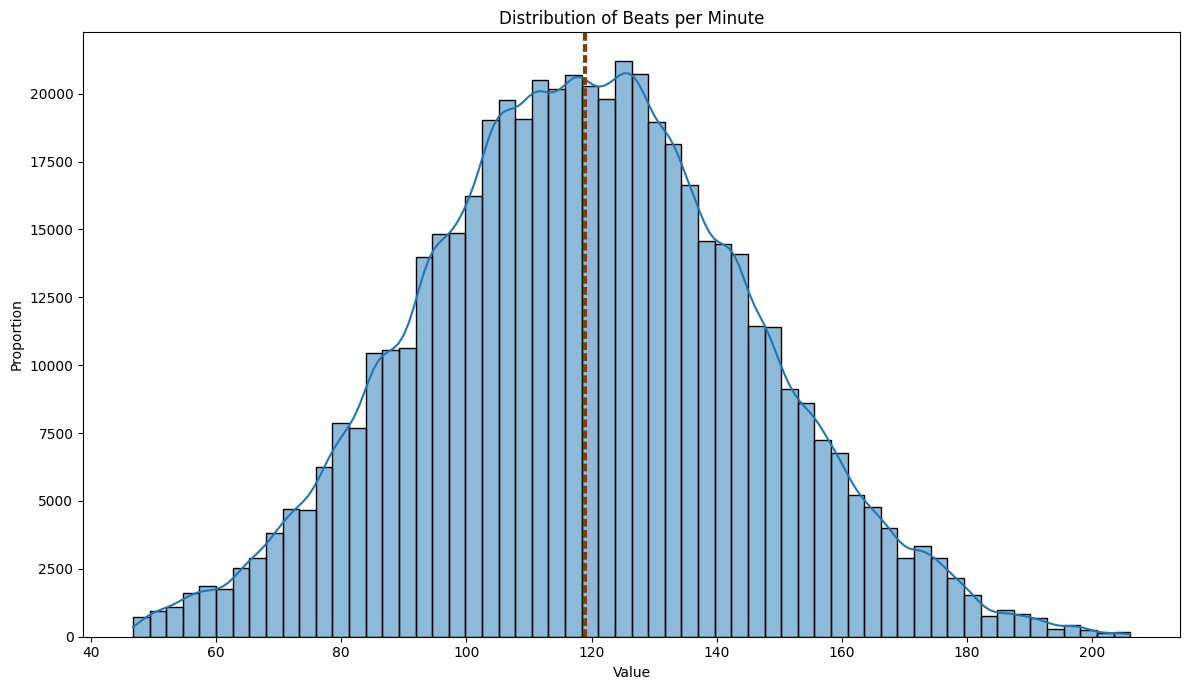

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
sns.histplot(x=y, kde=True, bins=60)
plt.axvline(y.mean(), color='red', linestyle='--',
            label=f'Mean: {y.mean():.2f}')
plt.axvline(y.median(), color='green', linestyle='--',
            label=f'Median: {y.median():.2f}')
plt.title('Distribution of Beats per Minute')
plt.xlabel('Value')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

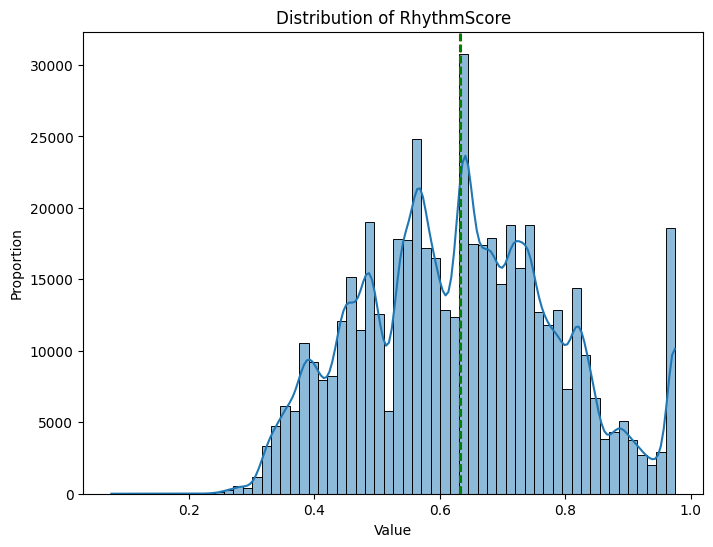

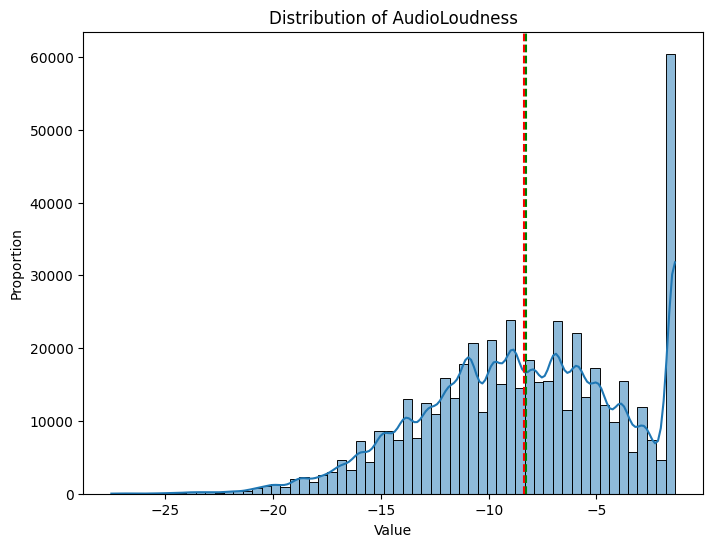

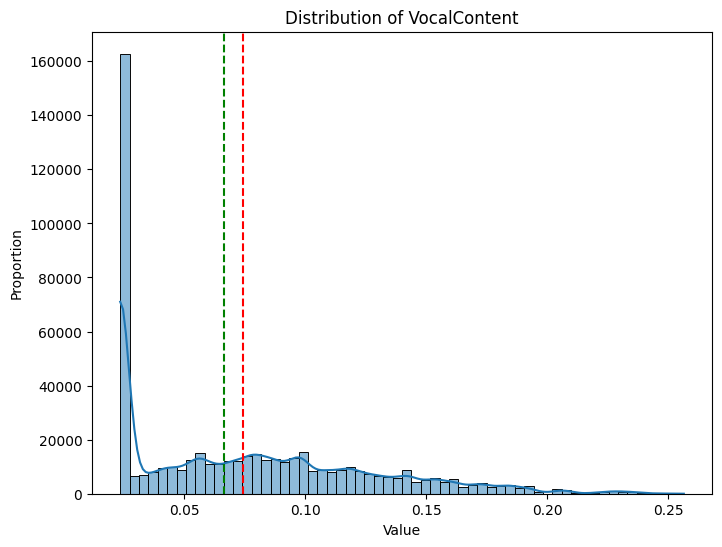

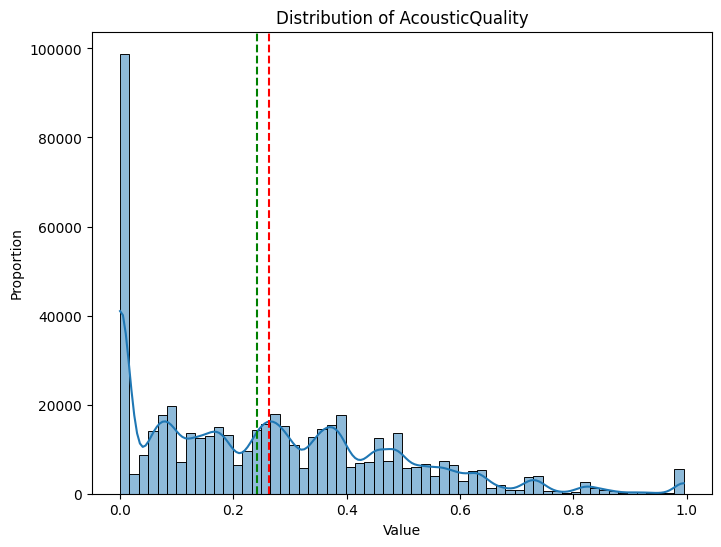

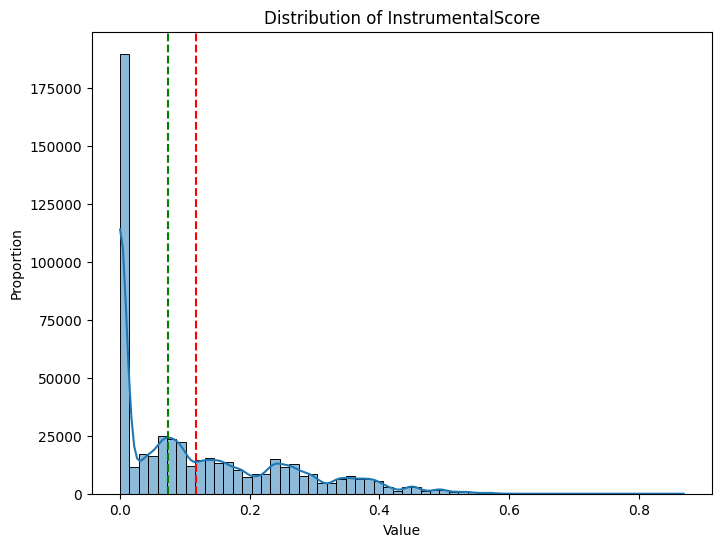

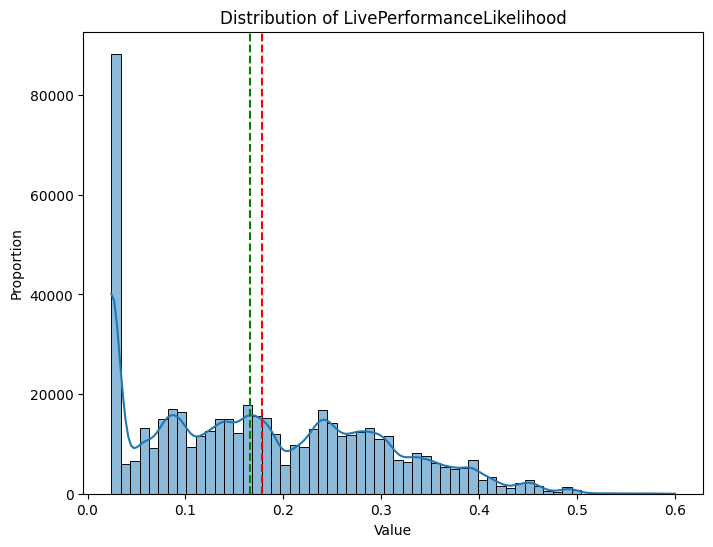

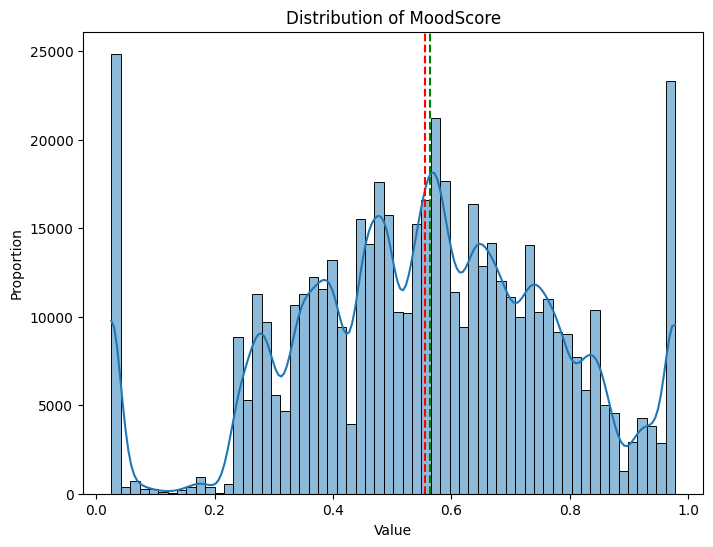

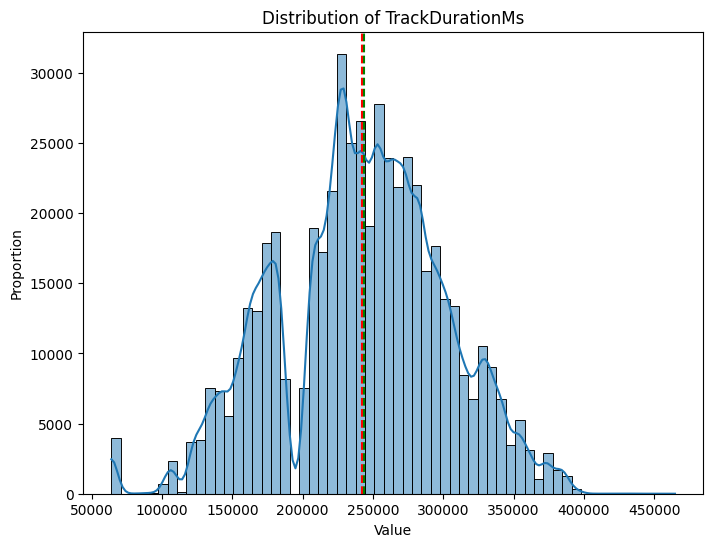

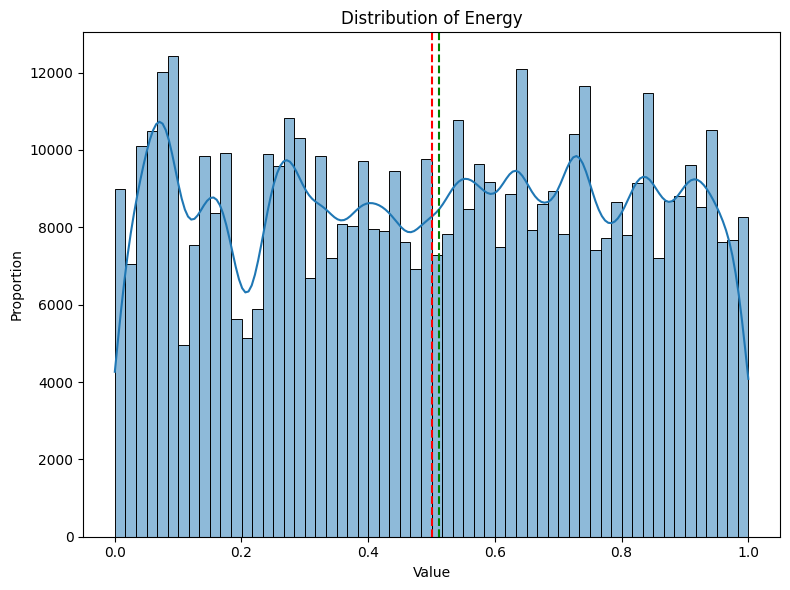

In [ ]:
X_columns = X.columns

for col in X_columns:
  plt.figure(figsize=(8,6))
  sns.histplot(x=X[col], kde=True, bins=60)
  plt.axvline(X[col].mean(), color='red', linestyle='--',
              label=f'Mean: {X[col].mean():.2f}')
  plt.axvline(X[col].median(), color='green', linestyle='--',
              label=f'Median: {X[col].median():.2f}')
  plt.title(f'Distribution of {col}')
  plt.xlabel('Value')
  plt.ylabel('Proportion')

plt.tight_layout()
plt.show()

<Axes: >

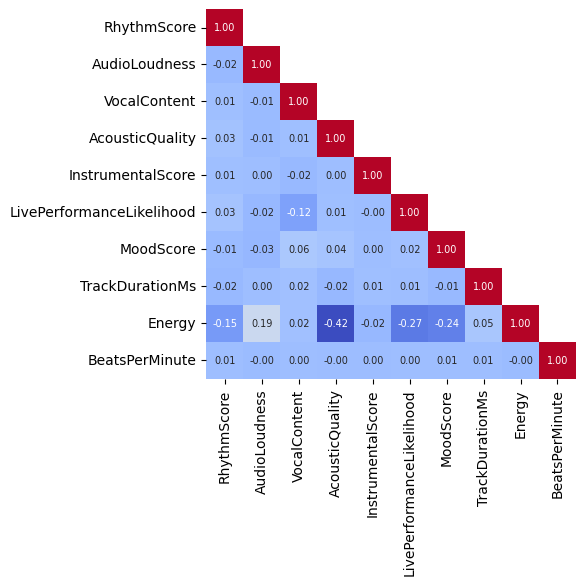

In [ ]:
corr_df = df.corr()
masked_corr_df = np.triu(np.ones_like(corr_df, dtype=bool), k=1)

sns.heatmap(
    data=corr_df,
    annot=True,
    fmt='.2f',
    mask=masked_corr_df,
    square=True,
    cmap='coolwarm',
    annot_kws={'size': 7},
    cbar=False
)

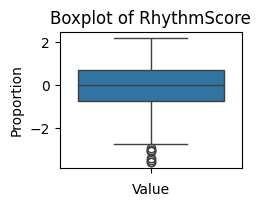

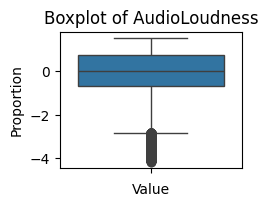

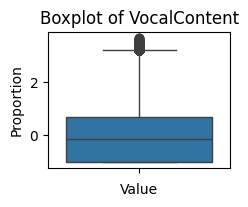

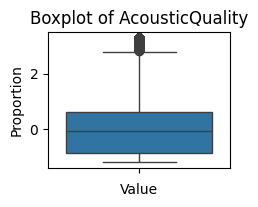

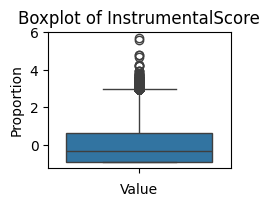

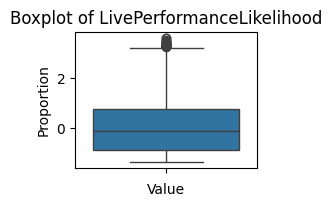

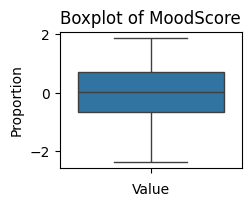

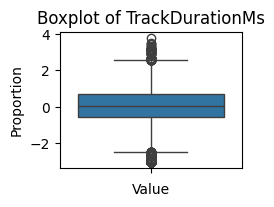

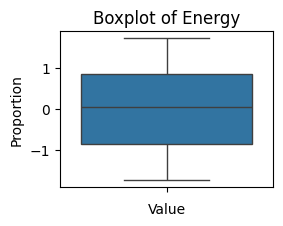

In [ ]:
for i, col in enumerate(X_columns):
  plt.figure(figsize=(8,6))
  plt.subplot(3,3,i+1)
  sns.boxplot(data=X[col])
  plt.title(f'Boxplot of {col}')
  plt.xlabel('Value')
  plt.ylabel('Proportion')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

for col in X_columns:
  std_scaler = StandardScaler()
  X[col] = std_scaler.fit_transform(X[[col]])

X.describe()

,RhythmScore,AudioLoudness,VocalContent,AcousticQuality,InstrumentalScore,LivePerformanceLikelihood,MoodScore,TrackDurationMs,Energy
count,5.241640e+05,5.241640e+05,5.241640e+05,5.241640e+05,5.241640e+05,5.241640e+05,5.241640e+05,5.241640e+05,5.241640e+05
mean,2.002995e-16,1.405187e-16,-2.044205e-17,9.232132e-16,1.271257e-16,4.413747e-16,2.758592e-16,1.865269e-17,1.034302e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.543318e+00,-4.144240e+00,-1.020114e+00,-1.178322e+00,-8.926359e-01,-1.303869e+00,-2.351620e+00,-2.999175e+00,-1.727375e+00
25%,-7.456619e-01,-6.873418e-01,-1.020114e+00,-8.672440e-01,-8.926359e-01,-8.525686e-01,-6.737735e-01,-5.866483e-01,-8.483792e-01
50%,1.174725e-02,2.740671e-02,-1.605663e-01,-9.147857e-02,-3.295000e-01,-1.021412e-01,3.979920e-02,3.000959e-02,3.751458e-02
75%,6.777355e-01,7.509864e-01,6.588087e-01,6.007710e-01,6.551296e-01,7.661505e-01,7.130984e-01,6.733574e-01,8.452345e-01
max,2.180745e+00,1.521162e+00,3.643643e+00,3.281138e+00,5.700409e+00,3.566645e+00,1.872258e+00,3.755815e+00,1.721241e+00


In [ ]:
# Taking care of outliers
features = ['RhythmScore', 'AudioLoudness', 'VocalContent', 'AcousticQuality',
          'InstrumentalScore', 'LivePerformanceLikelihood', 'TrackDurationMs']

for cols in features:
  Q1 = X[cols].quantile(0.25)
  Q3 = X[cols].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  X[cols] = np.where(X[cols] < lower, lower,
                       np.where(X[cols] > upper, upper, X[cols]))

### Initial Feature Engineering and Importance

This section introduces initial attempts at feature engineering and evaluates their importance. A `LightGBM` model is used to determine the significance of each feature, helping to identify which variables contribute most to the model's predictive power.

- **`get_feature_importance` function**: This custom function trains a LightGBM Regressor and extracts feature importances, which are then sorted and displayed.
- **Visualization**: A bar plot visualizes the top 20 most important features, providing a clear indication of their relative influence on the target variable.

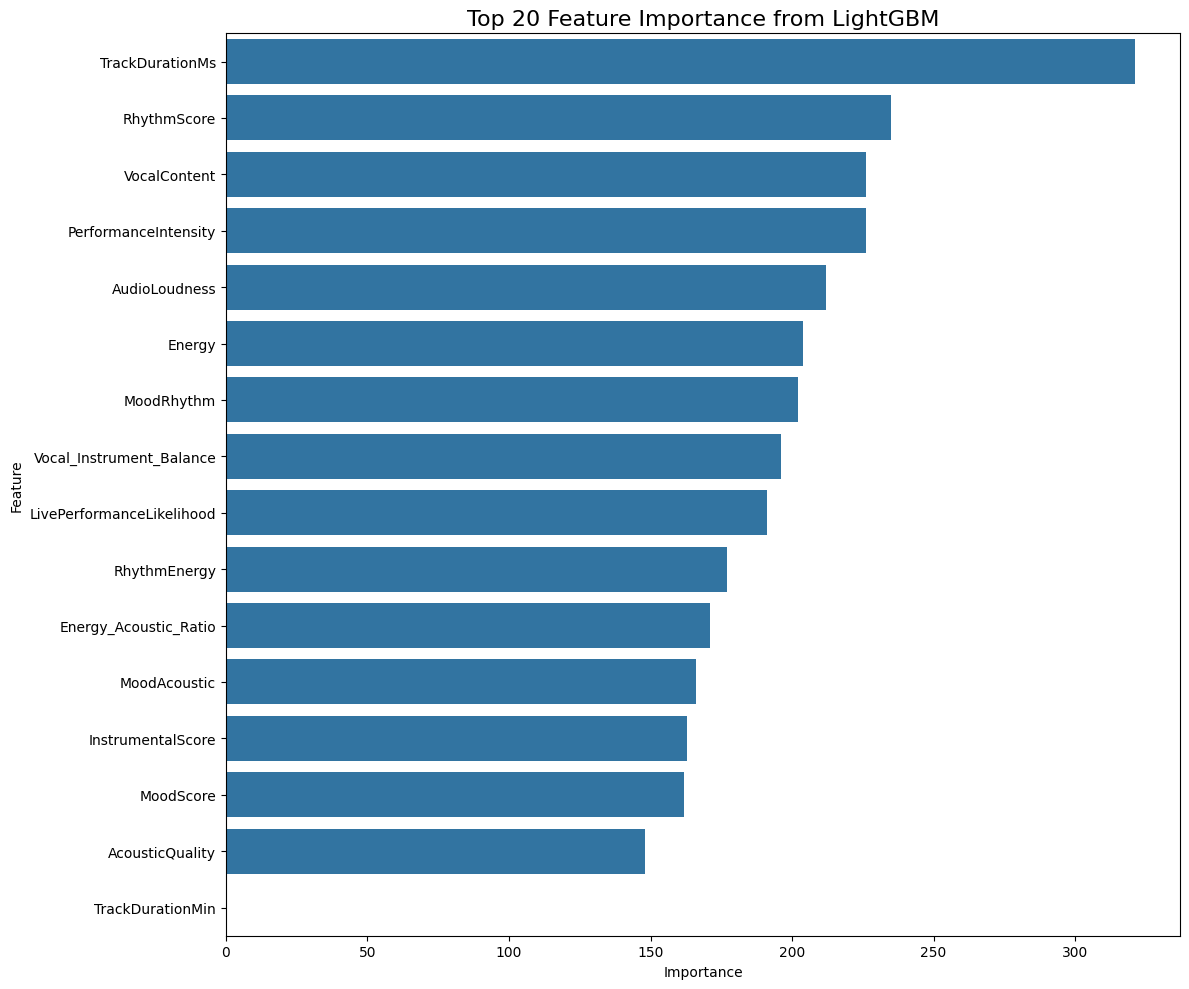

Top 10 most important features:
                      Feature  Importance
7             TrackDurationMs         321
0                 RhythmScore         235
2                VocalContent         226
13       PerformanceIntensity         226
1               AudioLoudness         212
8                      Energy         204
12                 MoodRhythm         202
11   Vocal_Instrument_Balance         196
5   LivePerformanceLikelihood         191
14               RhythmEnergy         177


In [ ]:
# Additional Feature Engineering
def get_feature_importance(X, y):
    """Get feature importance from a LightGBM model"""
    model = LGBMRegressor(random_state=42, verbose=-1)
    model.fit(X, y)

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    return importance_df

# Get feature importance
features_to_use = [col for col in X.columns]
X = X[features_to_use]
# y = X['BeatsPerMinute']

importance_df = get_feature_importance(X, y)

# Visualize feature importance
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importance from LightGBM', fontsize=16)
plt.tight_layout()
plt.show()

print("Top 10 most important features:")
print(importance_df.head(10))

### Preprocessing and Cross-Validation Setup for Tree Models

This section outlines advanced preprocessing steps tailored for tree-based models and the configuration of a cross-validation strategy.

- **`preprocess_data` function**: This function handles the splitting of data into features (`X`) and target (`y`), ensuring consistent column sets between training and test data. It applies `RobustScaler` for feature scaling, which is less sensitive to outliers than `StandardScaler`, making it suitable for datasets that might still contain extreme values even after initial outlier handling.
- **Cross-Validation (`KFold`)**: A `KFold` cross-validation strategy is set up with 5 splits, shuffled, and a fixed `random_state` for reproducibility. This approach divides the dataset into multiple folds, allowing the model to be trained and evaluated on different subsets of the data, providing a more robust estimate of performance.

In [ ]:
# Additional Preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold

def preprocess_data(train_df, test_df, target_col='BeatsPerMinute'):
    """Preprocess the data for modeling"""
    # Split features and target
    y_train = train_df[target_col]
    X_train = train_df.drop(target_col, axis=1)
    X_test = test_df.copy()

    # Ensure X_train and X_test have the same columns
    feature_names = X_train.columns.tolist()

    # Scale features - RobustScaler is good for data that might have outliers
    scaler = RobustScaler()
    X_train_scaled = pd.DataFrame(
        scaler.fit_transform(X_train),
        columns=feature_names
    )
    X_test_scaled = pd.DataFrame(
        scaler.transform(X_test),
        columns=feature_names
    )

    return X_train_scaled, y_train, X_test_scaled, feature_names

# Apply preprocessing
X_train, y_train, X_test, feature_names = preprocess_data(X, df_test)

# Set up cross-validation strategy
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
folds = list(kf.split(X_train))

# Check data shapes after preprocessing
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

### LightGBM Model Training and Hyperparameter Tuning

This section details the training of a LightGBM Regressor model, including data splitting, hyperparameter optimization, and initial performance evaluation.

- **Data Splitting**: The dataset is split into training and validation sets using `train_test_split` to evaluate the model's performance on unseen data.
- **`LGBMRegressor` Initialization**: An `LGBMRegressor` is initialized, a gradient boosting framework that uses tree-based learning algorithms. It is known for its speed and efficiency.
- **Hyperparameter Tuning (`RandomizedSearchCV`)**: `RandomizedSearchCV` is employed to efficiently search for the best combination of hyperparameters for the LightGBM model. It explores a defined parameter space, aiming to find optimal settings that minimize `neg_mean_squared_error`.
- **Model Evaluation**: After tuning, the best model's parameters and score are printed. Predictions are made on the validation set, and the Mean Squared Error (MSE) is calculated to assess the model's accuracy.

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor
import mlflow
from google.colab import userdata
import os

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
lgbm = LGBMRegressor()
params = {
    'max_depth': [3, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 500],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}
randomized_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=params,
    n_iter=20,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=4,
    verbose=2,
    random_state=42
)

randomized_search.fit(X_train, y_train)
print('Best params of the model: ', randomized_search.best_params_)
print('Best score of the model: ', randomized_search.best_score_)

preds = randomized_search.predict(X_val)

error_score = mean_squared_error(y_val, preds)**.5

print('MSE: ', error_score)

Fitting 4 folds for each of 20 candidates, totalling 80 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 366914, number of used features: 16
[LightGBM] [Info] Start training from score 119.061227
Best params of the model:  {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
Best score of the model:  -700.023506884679
MSE:  26.463063995812234


### Feature Importance from Tuned LightGBM

This section visualizes the feature importances derived from the best LightGBM model identified during hyperparameter tuning.

- **`best_estimator_`**: The `best_estimator_` attribute of the `RandomizedSearchCV` object provides access to the best performing model.
- **Visualization**: A horizontal bar chart is used to display the importance of each feature as determined by the `LGBMRegressor`. Features with higher importance values contribute more significantly to the model's predictions, offering insights into the most influential factors.

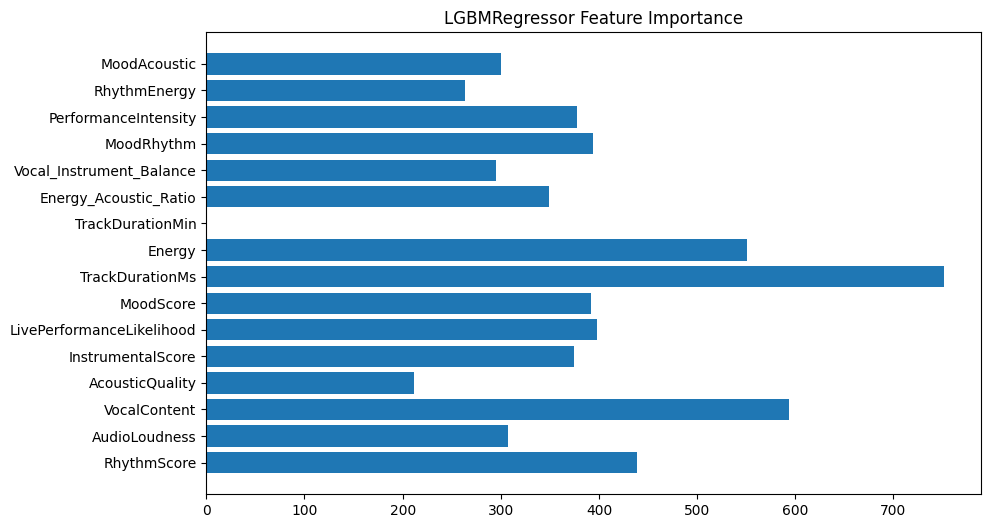

In [ ]:
best_model = randomized_search.best_estimator_
plt.figure(figsize=(10,6))
plt.barh(X.columns, best_model.feature_importances_)
plt.title("LGBMRegressor Feature Importance")
plt.show()

### Further Feature Engineering and LGBM Evaluation

This section focuses on creating additional, more complex features and then re-evaluating the LightGBM model with these enhanced features.

- **Feature Creation**: New features are engineered by combining existing ones, such as `TrackDurationMin` (converting milliseconds to minutes), `Energy_Acoustic_Ratio`, `Vocal_Instrument_Balance`, `MoodRhythm`, `PerformanceIntensity`, `RhythmEnergy`, and `MoodAcoustic`. These engineered features aim to capture more intricate relationships within the data, potentially improving model performance.
- **LGBM Re-evaluation**: An `LGBMRegressor` is re-trained with the augmented feature set. The `feature_importances_` of this new model are printed, along with its performance metrics (MSE and R2 score) on a validation set, to assess the impact of the newly engineered features.

In [ ]:
X['TrackDurationMin'] = X['TrackDurationMs'] / 60000
X['Energy_Acoustic_Ratio'] = X['Energy'] / (X['AcousticQuality'] + 1e-5)
X['Vocal_Instrument_Balance'] = X['VocalContent'] / (X['InstrumentalScore'] + 1e-5)
X['MoodRhythm'] = X['MoodScore'] * X['RhythmScore']
X['PerformanceIntensity'] = X['LivePerformanceLikelihood'] * X['AudioLoudness']
X['RhythmEnergy'] = X['RhythmScore'] * X['Energy']
X['MoodAcoustic'] = X['MoodScore'] * X['AcousticQuality']

In [ ]:
from sklearn.metrics import accuracy_score

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

lgbm = LGBMRegressor(n_estimators=50, learning_rate=0.01)
lgbm.fit(X_train, y_train)
print('Most relevant features for this training: ', lgbm.feature_importances_)
print('Best score of the model: ', lgbm.best_score_)

preds = lgbm.predict(X_val)

error_score = mean_squared_error(y_val, preds)**0.5
r2 = r2_score(y_val, preds)
print('MSE: ', error_score)
print('R2 score: ', r2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.067827 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 419331, number of used features: 16
[LightGBM] [Info] Start training from score 119.056554
Most relevant features for this training:  [121  56 166  39  99  61 129 228 131   0  99  41  83  84  65  98]
Best score of the model:  defaultdict(<class 'collections.OrderedDict'>, {})
MSE:  26.439859058110713
R2 score:  0.0003990047540435304


### Deep Learning Solution

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from itertools import combinations
import torch.nn as nn
import pandas as pd
import numpy as np
import warnings
import torch

# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
class Config:
    # Define the target column name
    target = 'BeatsPerMinute'

    # Load training, test, and sample submission data
    train = pd.read_csv('train.csv', index_col='id')
    test = pd.read_csv('test.csv', index_col='id')

    # Select computation device (GPU if available, else CPU)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Global random seed for reproducibility
    state = 42

    # Number of folds for cross-validation
    n_splits = 10

    # Early stopping patience for training
    early_stop = 20

    # Define evaluation metric
    metric = 'rmse'

    # Define task type (regression/classification/multiclass)
    task_type = "regression"

    # Boolean flag if the task is regression
    task_is_regression = task_type == 'regression'

    # Flags for preprocessing and feature engineering
    outliers = False      # Whether to remove outliers
    log_trf = False       # Whether to log-transform target
    feature_eng = True    # Whether to create new features
    missing = False       # Whether to impute missing values
    training = True       # Whether to run training (True) or load saved preds (False)

In [ ]:
def root_mean_squared_error(y_train, y_pred):
  return np.sqrt(mean_squared_error(y_train, y_pred))

In [ ]:
def set_seed(seed):
  # Set NumPy seed (controls randomness in NumPy operations)
  np.random.seed(seed)
  # Set PyTorch CPU seed
  torch.manual_seed(seed)
  # Set PyTorch GPU seed (all CUDA devices)
  torch.cuda.manual_seed_all(seed)
  # Ensure deterministic behavior for CuDNN
  torch.backends.cudnn.deterministic = True  # Disable nondeterministic algorithms
  torch.backends.cudnn.benchmark = False     # Turn off autotuner for convolution algorithms

In [ ]:
class Transform(Config):
    def __init__(self):
        super().__init__()

        # TODO: identify numeric feature columns from training data excluding target
        self.num_features = self.train.drop(self.target, axis=1).select_dtypes(exclude=['object', 'category']).columns.tolist()

        # TODO: identify categorical feature columns from training data excluding target
        self.cat_features = self.train.drop(self.target, axis=1).select_dtypes(include=['object', 'category']).columns.tolist()

        # TODO: if missing-value handling is enabled, apply the missing-value strategy
        if self.missing:
          self.missing_values()
        # TODO: if feature engineering is enabled, generate new features for train and test
        if self.feature_eng:
          self.train = self.new_features(self.train)
          self.test = self.new_features(self.test)
        # TODO: if outlier handling is enabled, detect and remove outliers
        if self.outliers:
          self.remove_outliers()
        # TODO: if log transformation is enabled, apply it to the target variable
        if self.log_trf:
          self.log_transformation()
        # TODO: encode categorical features and scale numerical ones
        self.encode()

    def __call__(self):
        # TODO: extract the target column from training data
        self.y = self.train[self.target]

        # TODO: extract raw feature matrix from training data
        self.X = self.train.drop(self.target, axis=1)

        # TODO: extract encoded feature matrix from encoded training data
        self.X_enc = self.train_enc.drop(self.target, axis=1)

        # TODO: return processed train/test datasets, feature metadata, and encodings
        return self.X, self.X_enc, self.y, self.test, self.test_enc, self.cat_features, self.num_features, self.cat_features_card

    def encode(self):
        # TODO: create copies of train and test datasets to avoid mutating originals
        self.train_enc = self.train.copy()
        self.test_enc = self.test.copy()

        # TODO: concatenate train and test data for consistent encoding
        data = pd.concat([self.train_enc, self.test_enc], axis=0)
        # TODO: encode categorical features into integer representations
        oe = OrdinalEncoder()
        data[self.cat_features] = oe.fit_transform(data[self.cat_features]).astype('int')
        # TODO: standardize numerical features using a scaler
        scaler = StandardScaler()
        data[self.num_features] = scaler.fit_transform(data[self.num_features])
        # TODO: split the combined data back into encoded train and test sets
        self.train_enc = data[~data[self.target].isna()] # this selects the rows where the value is not NaN
        self.test_enc = data[data[self.target].isna()].drop(self.target, axis=1)
        # TODO: compute and store cardinality (number of unique values) for each categorical feature
        self.cat_features_card = [data[f].nunique() for f in self.cat_features]

    def new_features(self, data):
        # TODO: generate pairwise interaction features (e.g., products and ratios) for numeric features
        for c1, c2 in list(combinations(self.num_features, 2)):
            data[f"{c1}_{c2}"] = data[c1] * data[c2]               # product
            data[f'{c1}_div_{c2}'] = data[c1] / (data[c2] + 1e-6)  # ratio
        # TODO: create quartile-based and decile-based bins for each numeric feature
        for c in self.num_features:
            data[f"{c}_quartile"] = pd.cut(data[c], bins=4, labels=False, include_lowest=True)
            data[f"{c}_decile"] = pd.cut(data[c], bins=10, labels=False, include_lowest=True)
        # TODO: return the dataset augmented with newly engineered features
        return data

    def log_transformation(self):
        # TODO: apply a log(1 + x) transformation to the target column in training data
        self.train[self.target] = np.log1p(self.train[self.target])

In [ ]:
# TODO: define a single residual block module (inherits from nn.Module)
class ResidualBlock(nn.Module):
    def __init__(self, in_features, out_features, dropout):
        super().__init__()

        # TODO: create the main transformation path:
        #       Linear(in_features -> out_features) -> BatchNorm1d(out_features) -> ReLU -> Dropout(dropout)
        self.fc = nn.Linear(in_features, out_features)
        self.bn = nn.BatchNorm1d(out_features)
        self.act = nn.ReLU()
        self.drop = nn.Dropout(dropout)

        # TODO: create the shortcut connection:
        #       use Identity() if in_features == out_features, otherwise use Linear(in_features -> out_features)
        self.shortcut = nn.Identity() if in_features == out_features else nn.Linear(in_features, out_features)

    def forward(self, x):
        # TODO: pass x through the main path in the correct order and store the output
        out = self.fc(x)
        out = self.bn(out)
        out = self.act(out)
        out = self.drop(out)

        # TODO: compute the residual/skip output from the shortcut branch
        res = self.shortcut(x)

        # TODO: add main path output and residual, then apply activation and return
        return self.act(out + res)


# TODO: define the full residual MLP regressor (inherits from nn.Module)
class MLPRegressor(nn.Module):
    def __init__(self, in_features, hidden_dims, dropout):
        super().__init__()

        # TODO: create a list to hold network layers
        layers = []

        # TODO: track the previous layer width, starting from in_features
        prev = in_features

        # TODO: loop over hidden_dims and append ResidualBlock(prev -> h, dropout) for each h
        #       then update prev to h
        for h in hidden_dims:
          layers.append(ResidualBlock(prev, h, dropout))
          prev = h

        # TODO: append the final regression head Linear(prev -> 1)
        layers.append(nn.Linear(prev, 1))
        # TODO: wrap the layer list into nn.Sequential and assign to self.net
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        # TODO: forward x through self.net, then squeeze output to shape [batch]
        return self.net(x).squeeze(1)

In [ ]:
def train_one_fold(X_tr, y_tr, X_va, y_va, params, epochs, batch_size, patience):
    # TODO: convert the numpy arrays into TensorDatasets (features float32, targets float32)
    ds_tr = TensorDataset(torch.from_numpy(X_tr).float(), torch.from_numpy(y_tr).float())
    ds_va = TensorDataset(torch.from_numpy(X_va).float(), torch.from_numpy(y_va).float())

    # TODO: create a DataLoader for training with shuffling and reasonable worker/pin_memory settings
    dl_tr = DataLoader(ds_tr, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2, persistent_workers=True)

    # TODO: create a DataLoader for validation without shuffling
    dl_va = DataLoader(ds_va, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers=1, persistent_workers=True)

    # TODO: initialize the model (e.g., MLPRegressor) using:
    #       - in_features = number of columns in X_tr
    #       - hidden_dims and dropout from params
    #       - move model to the configured device
    model = MLPRegressor(
        in_features=X_tr.shape[1],
        hidden_dims=params['hidden_dims'],
        dropout=params['dropout']
    ).to(Config.device)

    # TODO: create the optimizer (e.g., AdamW) using lr and weight_decay from params
    optimizer = torch.optim.AdamW(model.parameters(), lr=params['lr'], weight_decay=params['weight_decay'])

    # TODO: define the regression loss function (e.g., MSELoss)
    criterion = nn.MSELoss()

    # TODO: define a learning-rate scheduler that reacts to validation loss (e.g., ReduceLROnPlateau)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode="min", patience=max(patience // 4, 10), factor=0.5
    )

    # TODO: initialize early-stopping tracking variables:
    #       best_loss (inf), best_state (None), no_improve counter (0)
    best_loss = float('inf')
    best_state = None
    no_improve = 0

    # TODO: loop over epochs
    for epoch in range(epochs):
        # TODO: set model to train mode
        # TODO: iterate over training batches:
        #       - move xb/yb to device
        #       - zero gradients
        #       - forward pass to get preds
        #       - compute loss
        #       - backward pass
        #       - optimizer step
        #       - accumulate total training loss (scaled by batch size)
        model.train()
        train_loss = 0.0
        for xb, yb in dl_tr:
          xb, yb = xb.to(Config.device), yb.to(Config.device)
          optimizer.zero_grad()
          preds = model(xb)
          loss = criterion(preds, yb)
          loss.backward()
          optimizer.step()
          train_loss += loss.item() * xb.size(0)

        # TODO: compute average train loss over ds_tr
        train_loss /= len(ds_tr)
        # TODO: set model to eval mode
        model.eval()
        val_loss = 0.0
        # TODO: compute average validation loss over ds_va without gradients
        with torch.no_grad():
          for xb, yb in dl_va:
            xb, yb = xb.to(Config.device), yb.to(Config.device)
            preds_model = model(xb)
            val_loss += criterion(preds_model, yb).item() * xb.size(0)
        val_loss /= len(ds_va)
        # TODO: call scheduler.step(val_loss)
        scheduler.step(val_loss)
        # TODO: optionally print metrics every `patience` epochs
        if (epoch + 1) % patience == 0:
          print(f"Epoch {epoch+1:4d} | Train Loss: {train_loss:.6f} | Val Loss: {val_loss:.6f}")
        # TODO: implement early stopping:
        #       - if val loss improved: update best_loss, snapshot best_state to CPU, reset no_improve
        #       - else increment no_improve and break if it reaches patience

        if val_loss < best_loss:
          best_loss = val_loss
          best_state = {k: v.cpu() for k, v in model.state_dict().items()}
          no_improve = 0
        else:
          no_improve += 1
          if no_improve >= patience:
              print(f"Early stopping at epoch {epoch+1}, best val loss = {best_loss:.6f}")
              break

    # TODO: load the best_state weights back into the model (move tensors to device), then set eval mode
    model.load_state_dict({k: v.to(Config.device) for k,v in best_state.items()})
    model.eval()
    # TODO: compute final validation predictions (no_grad), return them as a numpy array
    with torch.no_grad():
      va_out = model(torch.from_numpy(X_va).float().to(Config.device)).cpu().numpy()

    # TODO: compute RMSE between y_va and va_out (e.g., root_mean_squared_error)
    rmse = root_mean_squared_error(y_va, va_out)

    # TODO: return (va_out, rmse, model)
    return va_out, rmse, model

In [ ]:
# ==============================
# Cross-validation training + prediction
# ==============================
def fit_predict_cv(X, y, X_test, seed=42):
    # TODO: set all relevant random seeds for reproducibility (python/numpy/torch as needed)
    set_seed(seed)
    # TODO: convert X, y, X_test from pandas objects to NumPy float32 arrays for PyTorch
    X_np = X.values.astype(np.float32)
    y_np = y.values.astype(np.float32)
    X_test_np = X_test.values.astype(np.float32)

    # TODO: create a KFold splitter using Config.n_splits, shuffle=True, and the provided seed
    kf = KFold(n_splits=Config.n_splits, shuffle=True, random_state=seed)

    # TODO: initialize an array for out-of-fold predictions (same length as training data)
    oof = np.zeros(len(X_np), dtype=np.float32)

    # TODO: initialize an array for test predictions (same length as test data), to be averaged across folds
    test_pred = np.zeros(len(X_test_np), dtype=np.float32)

    # TODO: define a params dictionary for model hyperparameters (hidden_dims, dropout, lr, weight_decay)
    params = {
        'hidden_dims': [448, 224, 192, 160, 128, 96],
        'dropout': 0.4,
        'lr': 1e-3,
        'weight_decay': 1e-3
    }

    # ==============================
    # Cross-validation loop
    # ==============================
    # TODO: iterate over folds produced by kf.split(X_np, y_np) and keep track of fold index (starting from 1)
    #       - print fold number
    #       - train one fold using train_one_fold() with the correct train/val splits
    #       - store fold validation predictions into oof at va_idx
    #       - run inference on X_test_np with the trained model (no_grad)
    #       - accumulate averaged test predictions by dividing by Config.n_splits
    #       - print fold RMSE
    for fold, (train_idx, val_idx) in enumerate(kf.split(X_np, y_np)):
      print(f'Going through Fold {fold +1}')
      X_train_fold, y_train_fold = X_np[train_idx], y_np[train_idx]
      X_val_fold, y_val_fold = X_np[val_idx], y_np[val_idx]
      va_out, rmse, model = train_one_fold(X_train_fold, y_train_fold, X_val_fold, y_val_fold, params, epochs=2000, batch_size=768, patience=Config.early_stop)

      oof[val_idx] = va_out
      with torch.no_grad():
        test_pred += model(torch.from_numpy(X_test_np).float().to(Config.device)).cpu().numpy() / Config.n_splits

      print(f"Fold {fold} RMSE: {rmse:.6f}")


    # ==============================
    # Final OOF score
    # ==============================
    # TODO: compute overall OOF RMSE using y_np and oof, then print it
    oof_rmse = root_mean_squared_error(y_np, oof)
    print(f"OOF RMSE: {oof_rmse:.6f}")

    # TODO: return oof predictions, averaged test predictions, and the OOF score
    return oof, test_pred, oof_rmse


# ==============================
# Main
# ==============================
def main():
    # ---------------------------------
    # Data preprocessing
    # ---------------------------------
    # TODO: instantiate the Transform pipeline
    t = Transform()

    # TODO: call the transform object to get:
    #       X, X_enc, y, test, test_enc, cat_features, num_features, cat_cardinalities
    X, X_enc, y, test, test_enc, cat_features, num_features, cat_cardinalities = t()

    # ---------------------------------
    # Cross-validation training + prediction
    # ---------------------------------
    # TODO: call fit_predict_cv using encoded train features, target, encoded test features, and Config.state as seed
    oof_preds, test_preds, oof_rmse = fit_predict_cv(
        X_enc,
        y,
        test_enc,
        seed=Config.state
    )

In [ ]:
if __name__ == "__main__":
  main()

Going through Fold 1
Epoch   20 | Train Loss: 831.888523 | Val Loss: 800.286684
Epoch   40 | Train Loss: 896.470128 | Val Loss: 833.207969
Early stopping at epoch 40, best val loss = 800.286684
Fold 0 RMSE: 28.289339
Going through Fold 2
Epoch   20 | Train Loss: 862.153299 | Val Loss: 756.566217
Epoch   40 | Train Loss: 724.831096 | Val Loss: 703.421465
Epoch   60 | Train Loss: 726.337713 | Val Loss: 704.714266
Early stopping at epoch 60, best val loss = 703.421465
Fold 1 RMSE: 26.522095
Going through Fold 3
Epoch   20 | Train Loss: 711.237956 | Val Loss: 719.822308
Epoch   40 | Train Loss: 716.537474 | Val Loss: 704.891555
Epoch   60 | Train Loss: 701.166036 | Val Loss: 703.981902
Epoch   80 | Train Loss: 700.709395 | Val Loss: 703.755979
Epoch  100 | Train Loss: 700.374017 | Val Loss: 703.521720
Early stopping at epoch 104, best val loss = 703.455879
Fold 2 RMSE: 26.522740
Going through Fold 4
Epoch   20 | Train Loss: 921.204773 | Val Loss: 888.486386
Epoch   40 | Train Loss: 717.816